## Data Cleaning and Pre-processing

In [3]:
import pandas as pd

df = pd.read_csv("filtered_complaints.csv")

df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/01/25,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,i submitted a mobile check deposit on XX/XX/XX...,NaN,JPMORGAN CHASE & CO.,WA,98026,NaN,Consent provided,Web,05/01/25,Closed with explanation,Yes,NaN,13284381
1,05/14/25,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Add-on products and services,Subject : CFPB Complaint Mishandling of Trip I...,NaN,JPMORGAN CHASE & CO.,GA,30082,NaN,Consent provided,Web,05/14/25,Closed with monetary relief,Yes,NaN,13505793
2,05/10/25,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,Unauthorized transaction cleared my checking a...,NaN,JPMORGAN CHASE & CO.,CA,95050,NaN,Consent provided,Web,05/10/25,Closed with explanation,Yes,NaN,13447218
3,12/18/24,Checking or savings account,Checking account,Closing an account,Company closed your account,"This is an update to Claim # XXXX, and it pain...",Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",SC,XXXXX,NaN,Consent provided,Web,12/18/24,Closed with monetary relief,Yes,NaN,11205922
4,02/18/25,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"For some reason, after I do not know how many ...",NaN,JPMORGAN CHASE & CO.,MI,491XX,NaN,Consent provided,Web,02/18/25,Closed with explanation,Yes,NaN,12103119


In [5]:
#keeping only relevant columns
df = df[[
    'Date received',
    'Product',
    'Sub-product',
    'Issue',
    'Sub-issue',
    'Consumer complaint narrative',
    'Company',
    'Company response to consumer',
    'Timely response?',
    'Consumer disputed?'
]]

# Drop rows with no complaint text
df = df[df['Consumer complaint narrative'].notnull()]

# Convert dates
df['Date received'] = pd.to_datetime(df['Date received'])

df.head()

/tmp/ipython-input-5-278021528.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date received'] = pd.to_datetime(df['Date received'])


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,Company response to consumer,Timely response?,Consumer disputed?
0,2025-05-01,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,i submitted a mobile check deposit on XX/XX/XX...,JPMORGAN CHASE & CO.,Closed with explanation,Yes,NaN
1,2025-05-14,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Add-on products and services,Subject : CFPB Complaint Mishandling of Trip I...,JPMORGAN CHASE & CO.,Closed with monetary relief,Yes,NaN
2,2025-05-10,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,Unauthorized transaction cleared my checking a...,JPMORGAN CHASE & CO.,Closed with explanation,Yes,NaN
3,2024-12-18,Checking or savings account,Checking account,Closing an account,Company closed your account,"This is an update to Claim # XXXX, and it pain...","BANK OF AMERICA, NATIONAL ASSOCIATION",Closed with monetary relief,Yes,NaN
4,2025-02-18,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"For some reason, after I do not know how many ...",JPMORGAN CHASE & CO.,Closed with explanation,Yes,NaN


## Adding Sentiment Analysis

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['Consumer complaint narrative'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Analysis

### 1.Most Common Issues

In [7]:
top_issues = df['Issue'].value_counts().head(10)
print(top_issues)


Issue
Managing an account                                             3426
Problem with a purchase shown on your statement                 1362
Closing an account                                              1011
Problem with a lender or other company charging your account     917
Other features, terms, or problems                               699
Opening an account                                               471
Getting a credit card                                            462
Problem caused by your funds being low                           403
Closing your account                                             367
Fees or interest                                                 320
Name: count, dtype: int64


### 2.Sentiment by Product



In [8]:
sentiment_by_product = df.groupby(['Product', 'sentiment']).size().unstack().fillna(0)
print(sentiment_by_product)


sentiment                    negative  neutral  positive
Product                                                 
Checking or savings account      4240      286      1746
Credit card                      1981       83      2164


### 3.Timely vs Non-Timely Response

In [9]:
timely_counts = df['Timely response?'].value_counts()
print(timely_counts)
#the output shows most of the complaints were resolved on time

Timely response?
Yes    10457
No        43
Name: count, dtype: int64


##  Visualization

/tmp/ipython-input-13-1437065817.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


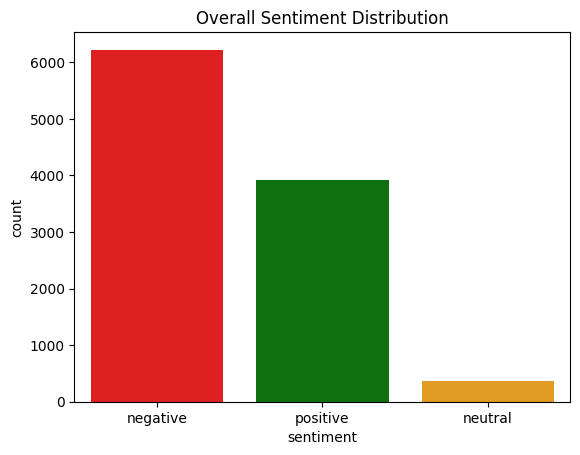

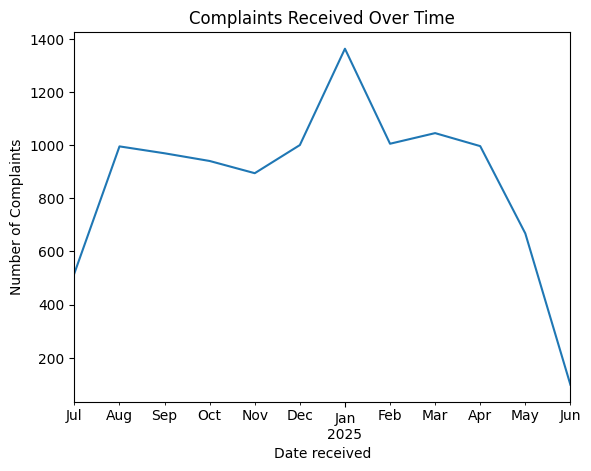

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution
sns.countplot(
    x='sentiment',
    #hue='sentiment',
    data=df,
    palette={'positive': 'green', 'neutral': 'orange', 'negative': 'red'}
)
plt.title('Overall Sentiment Distribution')
plt.show()

# Complaints over time
df.set_index('Date received').resample('ME').size().plot()
plt.title('Complaints Received Over Time')
plt.ylabel('Number of Complaints')
plt.show()


In [21]:
print(df.columns.tolist())


['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'sentiment_score', 'sentiment']


## Export cleaned dataset


In [14]:
df.to_csv('cleaned_complaints.csv', index=False)